In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# files = []
import os
cwd = os.getcwd()
print(cwd)

/home/divaparekh/cc-final-project


In [3]:
def parse_output(filename):
    
    avg_delays = []
    avg_bitrates = []
    
    output_file = open(filename)
    
    for line in output_file:

        if "Average delay" in line:
            data = line.split()
            avg_delays.append(float(data[3]))
        elif "Average bitrate" in line:
            data = line.split()
            bitrate = float(data[3])
            if data[4] == 'Kbit/s':
                avg_bitrates.append(bitrate * 1e3)
            elif data[4] == 'Mbit/s':
                avg_bitrates.append(bitrate * 1e6)
            else:
                print("Error in bitrate units\n")
        else:
            continue
        
    return avg_delays, avg_bitrates

In [4]:

#from os import walk

#f = []
#for (dirpath, dirnames, filenames) in walk(str(os.getcwd())+'/server_outputs/'):
#    f.extend(filenames)
#    break

#print(f)


In [5]:
qdiscs = ['noqueue','codel']
transports = ['tcp','udp']
high_bandwidths = [1.0, 2.5, 5.0, 10.0]
num_trials = 10

actual_output_files = []

# Be careful of not splitting data into 4ths correctly b/c of order of filenames
for bandwidth in high_bandwidths:
    for qdisc in qdiscs:
        for transport in transports:
            for i in range(1,num_trials+1):
                filename = './server_outputs/'
                filename += qdisc + "-" + transport + "-" + str(bandwidth) + "-" + str(i) + ".output"
                actual_output_files.append(filename)
                
#print(actual_output_files)

In [6]:
test_file = open('./server_outputs/noqueue-tcp-1.0-1.output',"r")
for line in test_file:
    print(line)

ITGDec version 2.8.1 (r1023)

Compile-time options: bursty multiport

----------------------------------------------------------

Flow number: 2

From 10.0.0.1:58058

To    10.0.0.2:10002

----------------------------------------------------------

Total time               =     35.148867 s

Total packets            =           484

Minimum delay            =      0.000073 s

Maximum delay            =     31.684383 s

Average delay            =     17.178950 s

Average jitter           =      0.079661 s

Delay standard deviation =      9.546713 s

Bytes received           =        145200

Average bitrate          =     33.048007 Kbit/s

Average packet rate      =     13.770003 pkt/s

Packets dropped          =             0 (0.00 %)

Average loss-burst size  =      0.000000 pkt

----------------------------------------------------------

----------------------------------------------------------

Flow number: 1

From 10.0.0.1:37128

To    10.0.0.2:10001

------------------------------

In [7]:
#test_output_files = ['~/cc-final-project/server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-1.output',
#                     '~/cc-final-project/server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-2.output']

#test_output_files = ['./server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-1.output',
#                     './server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-2.output']

all_delay_data_noqueue_tcp = []
all_delay_data_noqueue_udp = []
all_delay_data_codel_tcp = []
all_delay_data_codel_udp = []
all_bitrate_data_noqueue_tcp = []
all_bitrate_data_noqueue_udp = []
all_bitrate_data_codel_tcp = []
all_bitrate_data_codel_udp = []

for f in actual_output_files:
    
    #print(f)
    
    # File should exist - get rid of try-except
    #try:
    delays, bitrates = parse_output(f)
    #except:
        #print("File doesn't exist: move on")
       # continue
    flow_delays = delays[:3]
    flow_bitrates = bitrates[:3]
    total_avg_delay = delays[3]
    total_avg_bitrate = bitrates[3]
    #can you hear me no but you did just interrupt me watching this about to work
    
    # Note use of "extend" instead of "append" - this is to add each element but not as a list
    if "noqueue" in f:
        if "tcp" in f:
            all_delay_data_noqueue_tcp.extend(flow_delays)
            all_bitrate_data_noqueue_tcp.extend(flow_bitrates)
        elif "udp" in f:
            all_delay_data_noqueue_udp.extend(flow_delays)
            all_bitrate_data_noqueue_udp.extend(flow_bitrates)
    elif "codel" in f:
        if "tcp" in f:
            all_delay_data_codel_tcp.extend(flow_delays)
            all_bitrate_data_codel_tcp.extend(flow_bitrates)
        elif "udp" in f:
            all_delay_data_codel_udp.extend(flow_delays)
            all_bitrate_data_codel_udp.extend(flow_bitrates)
    else:
        print("Error: unknown qdisc in file name")



In [8]:
x = range(20)
print(x)
length = len(x)
print(x[:length//4])
print(x[length//4:2*length//4])
print(x[2*length//4:3*length//4])
print(x[3*length//4:])
print()
# OR
Q1_index = length//4
Q2_index = 2*length//4
Q3_index = 3*length//4
print(x[:Q1_index])
print(x[Q1_index:Q2_index])
print(x[Q2_index:Q3_index])
print(x[Q3_index:])

range(0, 20)
range(0, 5)
range(5, 10)
range(10, 15)
range(15, 20)

range(0, 5)
range(5, 10)
range(10, 15)
range(15, 20)


In [9]:
print(all_delay_data_noqueue_tcp)

[17.17895, 14.164721, 27.628142, 21.854604, 12.900751, 19.590794, 24.726554, 24.397663, 14.139091, 11.631879, 18.191096, 18.572964, 23.461146, 15.664389, 42.880797, 14.198792, 22.313587, 19.999307, 17.880409, 18.816601, 22.359356, 21.793218, 11.820045, 20.518634, 13.770609, 22.159403, 21.940485, 13.274863, 23.558576, 21.510744, 11.147423, 17.041746, 17.04744, 9.094289, 13.140816, 8.170822, 15.701657, 9.564279, 16.453375, 10.355222, 16.294802, 17.740095, 13.203678, 18.425101, 12.996792, 16.702121, 16.346139, 11.55182, 16.881355, 12.264774, 18.54992, 11.383952, 10.926152, 16.58989, 16.155062, 16.872446, 11.155679, 10.02573, 16.108564, 17.64887, 13.229761, 12.362447, 8.79787, 8.465969, 12.961255, 9.288469, 8.890514, 9.651225, 13.213101, 12.576067, 8.077076, 13.705809, 12.501712, 8.616165, 13.396448, 8.016845, 8.384101, 13.50364, 12.749625, 8.402375, 9.015328, 12.183515, 8.815027, 13.131865, 12.712998, 8.646857, 13.905851, 13.267544, 8.424304, 12.495293, 6.872349, 6.52392, 10.160476, 10.08

In [10]:
bandwidths = [0.1, 0.25, 0.5, 1.0]
# Use these to split up data into four evenly-sized chunks for plots (see above cell)
# Note: 3 = # of parallel flows
num_datapts = num_trials * 3 * len(bandwidths)

# Split all datasets up into quarters to place datapoints with respective bandwidths
Q1_index = num_datapts//4
Q2_index = 2*num_datapts//4
Q3_index = 3*num_datapts//4

all_data = np.zeros((6,2), dtype=object)

print(all_delay_data_noqueue_tcp[:Q1_index])
print(all_delay_data_noqueue_tcp[Q1_index:Q2_index])

all_data[0,0] = [all_delay_data_noqueue_tcp[:Q1_index],
                all_delay_data_noqueue_tcp[Q1_index:Q2_index],
                all_delay_data_noqueue_tcp[Q2_index:Q3_index],
                all_delay_data_noqueue_tcp[Q3_index:]]
all_data[0,1] = [all_delay_data_codel_tcp[:Q1_index],
                all_delay_data_codel_tcp[Q1_index:Q2_index],
                all_delay_data_codel_tcp[Q2_index:Q3_index],
                all_delay_data_codel_tcp[Q3_index:]]
all_data[1,0] = [all_delay_data_noqueue_udp[:Q1_index],
                all_delay_data_noqueue_udp[Q1_index:Q2_index],
                all_delay_data_noqueue_udp[Q2_index:Q3_index],
                all_delay_data_noqueue_udp[Q3_index:]]
all_data[1,1] = [all_delay_data_codel_udp[:Q1_index],
                all_delay_data_codel_udp[Q1_index:Q2_index],
                all_delay_data_codel_udp[Q2_index:Q3_index],
                all_delay_data_codel_udp[Q3_index:]]
all_data[2,0] = [all_bitrate_data_noqueue_tcp[:Q1_index],
                all_bitrate_data_noqueue_tcp[Q1_index:Q2_index],
                all_bitrate_data_noqueue_tcp[Q2_index:Q3_index],
                all_bitrate_data_noqueue_tcp[Q3_index:]]
all_data[2,1] = [all_bitrate_data_codel_tcp[:Q1_index],
                all_bitrate_data_codel_tcp[Q1_index:Q2_index],
                all_bitrate_data_codel_tcp[Q2_index:Q3_index],
                all_bitrate_data_codel_tcp[Q3_index:]]
all_data[3,0] = [all_bitrate_data_noqueue_udp[:Q1_index],
                all_bitrate_data_noqueue_udp[Q1_index:Q2_index],
                all_bitrate_data_noqueue_udp[Q2_index:Q3_index],
                all_bitrate_data_noqueue_udp[Q3_index:]]
all_data[3,1] = [all_bitrate_data_codel_udp[:Q1_index],
                all_bitrate_data_codel_udp[Q1_index:Q2_index],
                all_bitrate_data_codel_udp[Q2_index:Q3_index],
                all_bitrate_data_codel_udp[Q3_index:]]
#all_data[4,0] = group9_data
#all_data[4,1] = group9_data
#all_data[5,0] = group9_data
#all_data[5,1] = group9_data

[17.17895, 14.164721, 27.628142, 21.854604, 12.900751, 19.590794, 24.726554, 24.397663, 14.139091, 11.631879, 18.191096, 18.572964, 23.461146, 15.664389, 42.880797, 14.198792, 22.313587, 19.999307, 17.880409, 18.816601, 22.359356, 21.793218, 11.820045, 20.518634, 13.770609, 22.159403, 21.940485, 13.274863, 23.558576, 21.510744]
[11.147423, 17.041746, 17.04744, 9.094289, 13.140816, 8.170822, 15.701657, 9.564279, 16.453375, 10.355222, 16.294802, 17.740095, 13.203678, 18.425101, 12.996792, 16.702121, 16.346139, 11.55182, 16.881355, 12.264774, 18.54992, 11.383952, 10.926152, 16.58989, 16.155062, 16.872446, 11.155679, 10.02573, 16.108564, 17.64887]


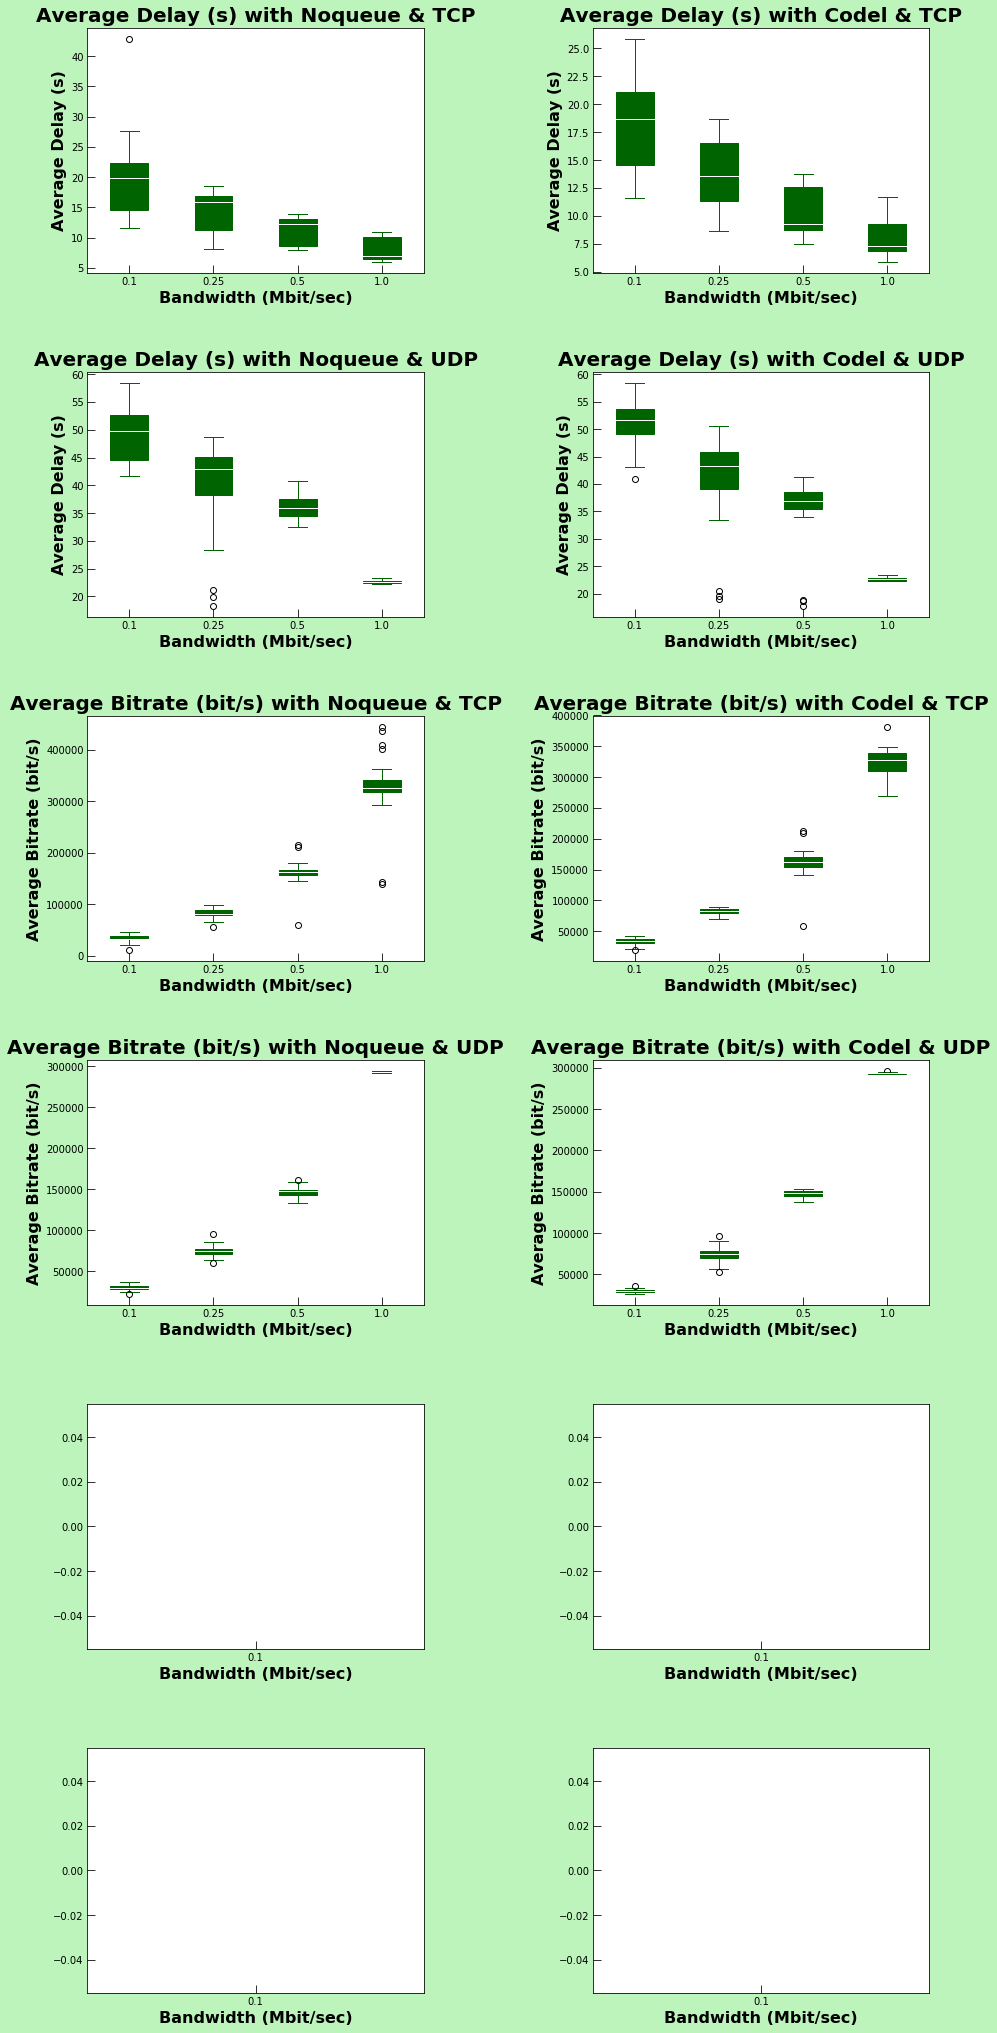

In [11]:
# Figure settings
fig, axs = plt.subplots(6,2, figsize=(13,26))
fig.patch.set_facecolor('lightgreen')
fig.patch.set_alpha(0.6)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1.1,
                    hspace=0.4, wspace=0.5)

for row in range(6):
    for col in range(2):
        
        plot = axs[row, col].boxplot(all_data[row, col], patch_artist=True)#, showfliers=False)
        
        title = ""
            
        if row == 0 and col == 0:
            title = "Average Delay (s) with Noqueue & TCP"
            axs[row, col].set_ylabel('Average Delay (s)', fontsize=16, fontweight='bold')
        elif row == 0 and col == 1:
            title = "Average Delay (s) with Codel & TCP"
            axs[row, col].set_ylabel('Average Delay (s)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 0:
            title = "Average Delay (s) with Noqueue & UDP"
            axs[row, col].set_ylabel('Average Delay (s)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 1:
            title = "Average Delay (s) with Codel & UDP"
            axs[row, col].set_ylabel('Average Delay (s)', fontsize=16, fontweight='bold')
        elif row == 2 and col == 0:
            title = "Average Bitrate (bit/s) with Noqueue & TCP"
            axs[row, col].set_ylabel('Average Bitrate (bit/s)', fontsize=16, fontweight='bold')
            #axs[row, col].set_yticks(np.arange(50000, 200000, 50000))
            #axs[row, col].set_yscale('log')
        elif row == 2 and col == 1:
            title = "Average Bitrate (bit/s) with Codel & TCP"
            axs[row, col].set_ylabel('Average Bitrate (bit/s)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 0:
            title = "Average Bitrate (bit/s) with Noqueue & UDP"
            axs[row, col].set_ylabel('Average Bitrate (bit/s)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 1:
            title = "Average Bitrate (bit/s) with Codel & UDP"
            axs[row, col].set_ylabel('Average Bitrate (bit/s)', fontsize=16, fontweight='bold')
        
        axs[row, col].set_title(title, fontsize=20, fontweight='bold')
        axs[row, col].set_xticklabels(bandwidths)
        axs[row, col].tick_params(direction="in", length=8)
        axs[row, col].set_xlabel('Bandwidth (Mbit/sec)', fontsize=16, fontweight='bold')
        
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            if item == 'medians':
                plt.setp(plot[item], color='white')
            else:
                plt.setp(plot[item], color='darkgreen')

# Replace Bitrate with Link Utilization

In [12]:
def parse_output_file(filename):
    
    avg_delays = []
    avg_bitrates = []
    
    output_file = open(filename)
    
    for line in output_file:
        
        if "Average delay" in line:
            data = line.split()
            avg_delays.append(float(data[3]))
        elif "Average bitrate" in line:
            data = line.split()
            bitrate = float(data[3])
            if data[4] == 'Kbit/s':
                avg_bitrates.append(bitrate * 1e3)
            elif data[4] == 'Mbit/s':
                avg_bitrates.append(bitrate * 1e6)
            else:
                print("Error in bitrate units\n")
        else:
            continue
    
    return avg_delays, avg_bitrates

In [13]:
#test_output_files = ['~/cc-final-project/server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-1.output',
#                     '~/cc-final-project/server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-2.output']

#test_output_files = ['./server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-1.output',
#                     './server_outputs/apr-28-ishouldsleep/noqueue-tcp-1-2.output']

all_delay_data_noqueue_tcp = []
all_delay_data_noqueue_udp = []
all_delay_data_codel_tcp = []
all_delay_data_codel_udp = []
all_bitrate_data_noqueue_tcp = []
all_bitrate_data_noqueue_udp = []
all_bitrate_data_codel_tcp = []
all_bitrate_data_codel_udp = []

# Switch to actual_output_files - but make sure to switch to the correct path!
#for f in test_output_files:
for f in actual_output_files:
    
    
    # File should exist - get rid of try-except
    #try:
    delays, bitrates = parse_output(f)
    #except:
    #    print("File doesn't exist: move on")
    #    continue
    total_avg_delay = delays[3]
    total_avg_bitrate = bitrates[3]
    #can you hear me no but you did just interrupt me watching this about to work
    
    # Note use of "extend" instead of "append" - this is to add each element but not as a list
    if "noqueue" in f:
        if "tcp" in f:
            all_delay_data_noqueue_tcp.append(total_avg_delay)
            all_bitrate_data_noqueue_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_noqueue_udp.append(total_avg_delay)
            all_bitrate_data_noqueue_udp.append(total_avg_bitrate)
    elif "codel" in f:
        if "tcp" in f:
            all_delay_data_codel_tcp.append(total_avg_delay)
            all_bitrate_data_codel_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_codel_udp.append(total_avg_delay)
            all_bitrate_data_codel_udp.append(total_avg_bitrate)
    else:
        print("Error: unknown qdisc in file name")


In [14]:
# Split datasets up into quarters to place datapoints with respective bandwidths
# and convert bitrate to linkutil
bandwidths = [0.1, 0.25, 0.5, 1.0]
# Use these to split up data into four evenly-sized chunks for plots
num_datapts = num_trials * len(bandwidths)

# Split all datasets 
Q1_index = num_datapts//4
Q2_index = 2*num_datapts//4
Q3_index = 3*num_datapts//4

all_data = np.zeros((6,2), dtype=object)

#print(all_delay_data_noqueue_tcp[:Q1_index])
#print(all_delay_data_noqueue_tcp[Q1_index:Q2_index])

all_linkutil_data_noqueue_tcp = []
all_linktuil_data_noqueue_udp = []
all_linkutil_data_codel_tcp = []
all_linkutil_data_codel_udp = []


all_linkutil_data_noqueue_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[:Q1_index]]
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q1_index:Q2_index]])
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q2_index:Q3_index]])
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q3_index:]])

all_linkutil_data_noqueue_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[:Q1_index]]
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q1_index:Q2_index]])
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q2_index:Q3_index]])
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q3_index:]])

all_linkutil_data_codel_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_codel_tcp[:Q1_index]]
all_linkutil_data_codel_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q1_index:Q2_index]])
all_linkutil_data_codel_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q2_index:Q3_index]])
all_linkutil_data_codel_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q3_index:]])

all_linkutil_data_codel_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_codel_udp[:Q1_index]]
all_linkutil_data_codel_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q1_index:Q2_index]])
all_linkutil_data_codel_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q2_index:Q3_index]])
all_linkutil_data_codel_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q3_index:]])


In [15]:
# Organize data for plotting
all_data[0,0] = [all_delay_data_noqueue_tcp[:Q1_index],
                all_delay_data_noqueue_tcp[Q1_index:Q2_index],
                all_delay_data_noqueue_tcp[Q2_index:Q3_index],
                all_delay_data_noqueue_tcp[Q3_index:]]
all_data[0,1] = [all_delay_data_codel_tcp[:Q1_index],
                all_delay_data_codel_tcp[Q1_index:Q2_index],
                all_delay_data_codel_tcp[Q2_index:Q3_index],
                all_delay_data_codel_tcp[Q3_index:]]
all_data[1,0] = [all_delay_data_noqueue_udp[:Q1_index],
                all_delay_data_noqueue_udp[Q1_index:Q2_index],
                all_delay_data_noqueue_udp[Q2_index:Q3_index],
                all_delay_data_noqueue_udp[Q3_index:]]
all_data[1,1] = [all_delay_data_codel_udp[:Q1_index],
                all_delay_data_codel_udp[Q1_index:Q2_index],
                all_delay_data_codel_udp[Q2_index:Q3_index],
                all_delay_data_codel_udp[Q3_index:]]
all_data[2,0] = [all_linkutil_data_noqueue_tcp[:Q1_index],
                all_linkutil_data_noqueue_tcp[Q1_index:Q2_index],
                all_linkutil_data_noqueue_tcp[Q2_index:Q3_index],
                all_linkutil_data_noqueue_tcp[Q3_index:]]
all_data[2,1] = [all_linkutil_data_codel_tcp[:Q1_index],
                all_linkutil_data_codel_tcp[Q1_index:Q2_index],
                all_linkutil_data_codel_tcp[Q2_index:Q3_index],
                all_linkutil_data_codel_tcp[Q3_index:]]
all_data[3,0] = [all_linkutil_data_noqueue_udp[:Q1_index],
                all_linkutil_data_noqueue_udp[Q1_index:Q2_index],
                all_linkutil_data_noqueue_udp[Q2_index:Q3_index],
                all_linkutil_data_noqueue_udp[Q3_index:]]
all_data[3,1] = [all_linkutil_data_codel_udp[:Q1_index],
                all_linkutil_data_codel_udp[Q1_index:Q2_index],
                all_linkutil_data_codel_udp[Q2_index:Q3_index],
                all_linkutil_data_codel_udp[Q3_index:]]
#all_data[4,0] = group9_data
#all_data[4,1] = group9_data
#all_data[5,0] = group9_data
#all_data[5,1] = group9_data

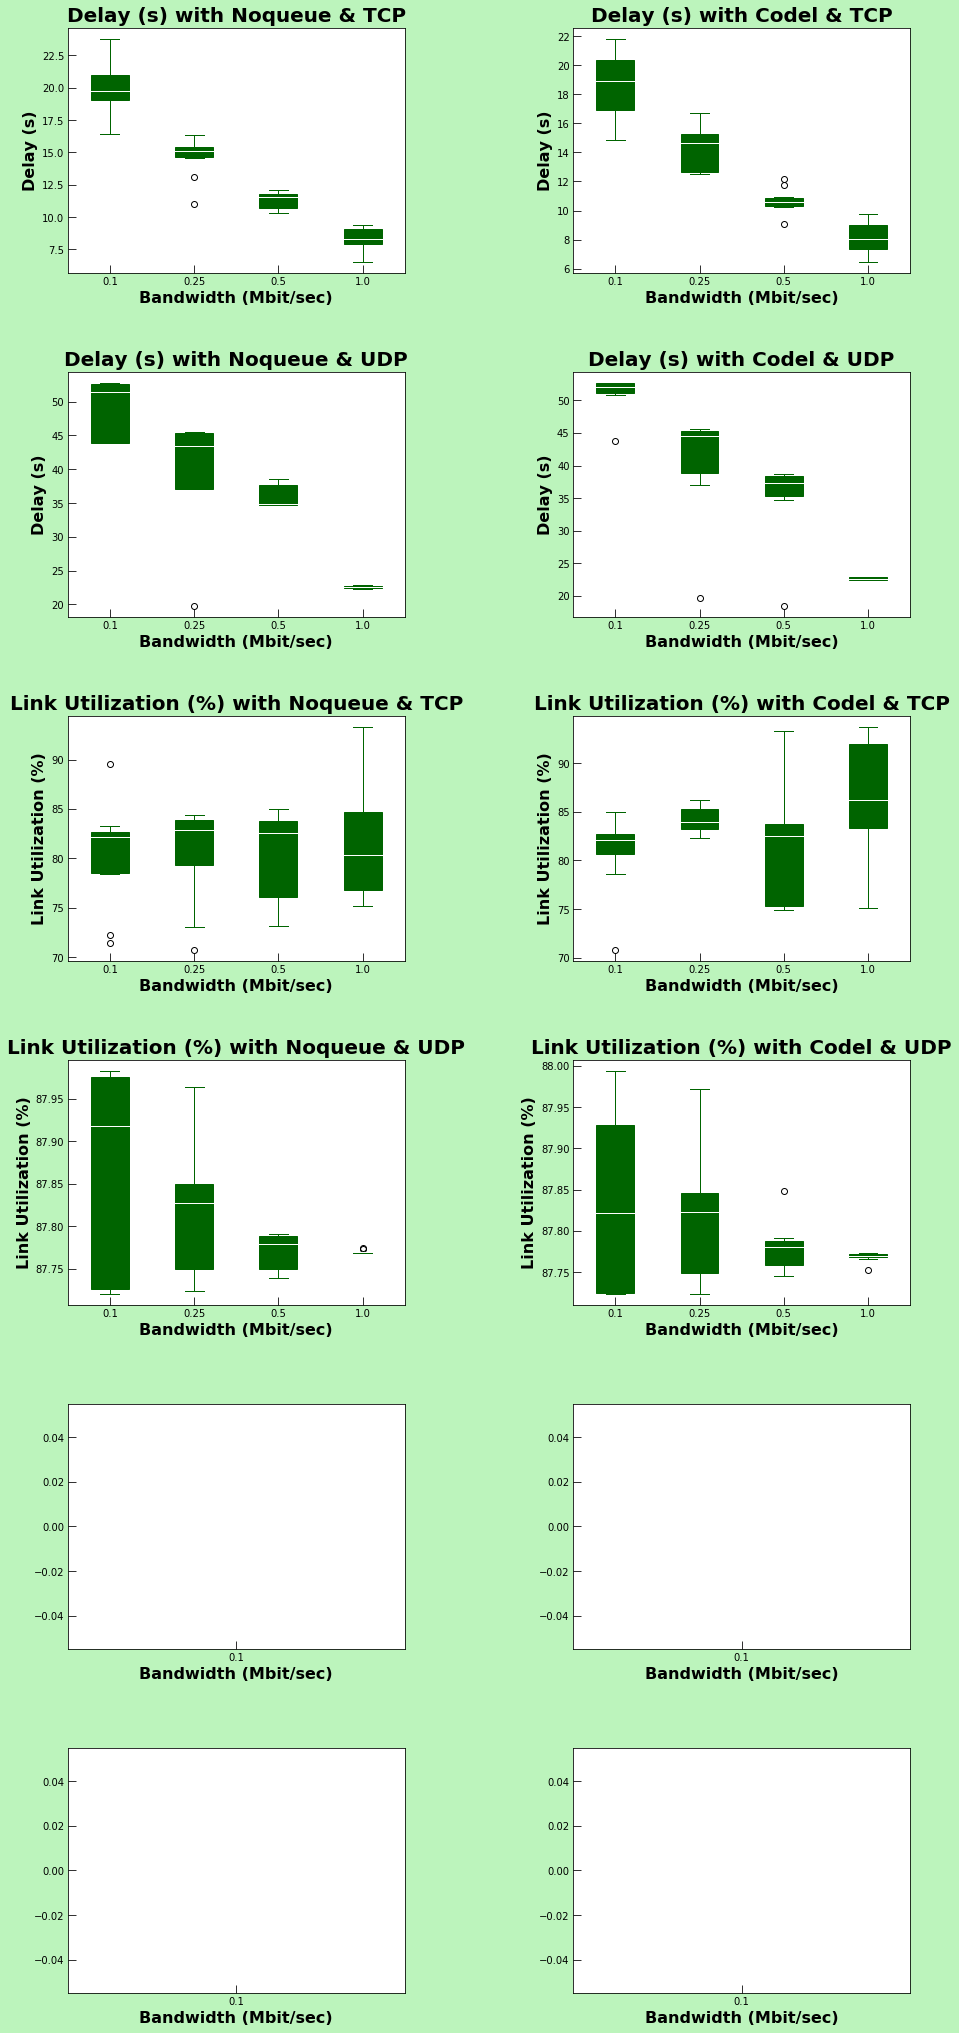

In [16]:
# Figure settings
fig, axs = plt.subplots(6,2, figsize=(13,26))
fig.patch.set_facecolor('lightgreen')
fig.patch.set_alpha(0.6)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1.1,
                    hspace=0.4, wspace=0.5)

for row in range(6):
    for col in range(2):
        
        plot = axs[row, col].boxplot(all_data[row, col], patch_artist=True)#, showfliers=False)
        
        title = ""
            
        if row == 0 and col == 0:
            title = "Delay (s) with Noqueue & TCP"
            axs[row, col].set_ylabel('Delay (s)', fontsize=16, fontweight='bold')
        elif row == 0 and col == 1:
            title = "Delay (s) with Codel & TCP"
            axs[row, col].set_ylabel('Delay (s)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 0:
            title = "Delay (s) with Noqueue & UDP"
            axs[row, col].set_ylabel('Delay (s)', fontsize=16, fontweight='bold')
        elif row == 1 and col == 1:
            title = "Delay (s) with Codel & UDP"
            axs[row, col].set_ylabel('Delay (s)', fontsize=16, fontweight='bold')
        elif row == 2 and col == 0:
            title = "Link Utilization (%) with Noqueue & TCP"
            axs[row, col].set_ylabel('Link Utilization (%)', fontsize=16, fontweight='bold')
        elif row == 2 and col == 1:
            title = "Link Utilization (%) with Codel & TCP"
            axs[row, col].set_ylabel('Link Utilization (%)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 0:
            title = "Link Utilization (%) with Noqueue & UDP"
            axs[row, col].set_ylabel('Link Utilization (%)', fontsize=16, fontweight='bold')
        elif row == 3 and col == 1:
            title = "Link Utilization (%) with Codel & UDP"
            axs[row, col].set_ylabel('Link Utilization (%)', fontsize=16, fontweight='bold')
        
        axs[row, col].set_title(title, fontsize=20, fontweight='bold')
        axs[row, col].set_xticklabels(bandwidths)
        axs[row, col].tick_params(direction="in", length=8)
        axs[row, col].set_xlabel('Bandwidth (Mbit/sec)', fontsize=16, fontweight='bold')
        
        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            if item == 'medians':
                plt.setp(plot[item], color='white')
            else:
                plt.setp(plot[item], color='darkgreen')